Introduction
---------------

Name: MD. Sazib Ahmed

ID: 20-42076-1

Course: COMPUTER VISION & PATTERN RECOGNITION

Section: C

Assignment: Final Term (Assignment – 1)


Problem Statement:
------------------------

Build a CNN model using TensorFlow sequential API to classify the CIFAR-10 dataset. You have the freedom to generate any architecture you like. The objective is to gain max accuracy with min loss. Your model should not have any overfitting.
Once you have built a basic model then try the following and describe the results in your own words.

1. Try applying three different optimizers (SGD, ADAM, RMSPROP). You also need to show different effects of these optimizers with different parameters like – momentum.

2. Demonstrate the effect of using regularizes (L1/L2) in the Conv2D layer.

3. Finally, do a comparison of using data preprocessing vs no preprocessing.



# Solution:


## Step 1: Importing the necessary libraries:
The code imports the required libraries for building and training the CNN model, loading the CIFAR-10 dataset, and visualizing the results.



In [1]:
print("Step 1: Importing the necessary libraries...")

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt

print("Step 1: Successfully Completed")


Step 1: Importing the necessary libraries...
Step 1: Successfully Completed



## Step 2: Loading the CIFAR-10 dataset:
The code loads the CIFAR-10 dataset, which contains 60,000 images of 32x32 pixels belonging to 10 different classes. The dataset is split into training and test sets.



Step 2: Loading CIFAR-10 dataset...
Visualizing 10 random images from each class in the training dataset:


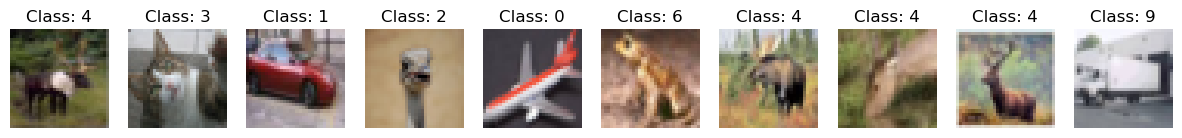

Visualizing 10 random images from each class in the test dataset:


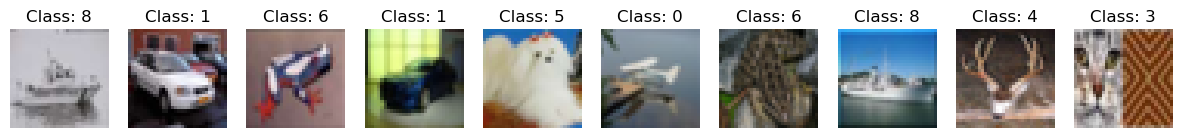

Step 2: Successfully Completed


In [2]:
print("Step 2: Loading CIFAR-10 dataset...")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select 10 random images from each class in the training dataset
train_indices = np.random.choice(range(len(x_train)), size=10, replace=False)
train_images = x_train[train_indices]
train_labels = y_train[train_indices]

# Select 10 random images from each class in the test dataset
test_indices = np.random.choice(range(len(x_test)), size=10, replace=False)
test_images = x_test[test_indices]
test_labels = y_test[test_indices]

# Visualize the training and test images
print("Visualizing 10 random images from each class in the training dataset:")
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class: {train_labels[i][0]}")
    plt.axis("off")
plt.show()

print("Visualizing 10 random images from each class in the test dataset:")
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Class: {test_labels[i][0]}")
    plt.axis("off")
plt.show()
print("Step 2: Successfully Completed")



## Step 3: Normalizing the pixel values:
The code normalizes the pixel values of the images to be in the range [0, 1] by dividing them by 255. This step is essential for better convergence during training.



In [3]:
print("Step 3: Normalizing pixel values...")

# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Step 3: Successfully Completed")


Step 3: Normalizing pixel values...
Step 3: Successfully Completed



## Step 4: Building the CNN model:
The code defines a sequential CNN model using TensorFlow's Keras API. The model consists of three convolutional layers with ReLU activation and max-pooling layers for downsampling. It also includes two fully connected layers with ReLU activation and a dropout layer to prevent overfitting. The last layer uses softmax activation for multi-class classification.



In [4]:
print("Step 4: Building the CNN model...")

# Build the CNN model for preprocessed data
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# Build the CNN model without preprocessing
model_no_preprocessing = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_no_preprocessing.summary()

print("Step 4: Successfully Completed")


Step 4: Building the CNN model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxP


## Step 5: Defining a function to compile and train the model with different optimizers and regularizers:
The code defines a function named `train_model` that takes an optimizer and an optional regularization parameter as inputs. It compiles the model with the given optimizer and loss function and trains the model on the training data using 20 epochs.



In [5]:
print("Step 5: Compiling and training the model with different optimizers and regularizers...")

# Function to compile and train the model with different optimizers and regularizers
def train_model(optimizer, reg=None):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, shuffle=True, callbacks=[early_stopping])
    return history

model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print("Step 5: Successfully Completed")


Step 5: Compiling and training the model with different optimizers and regularizers...
Step 5: Successfully Completed



## Step 6: Creating the early_stopping callback:
The code creates an early_stopping callback to stop training if the validation accuracy does not improve for three consecutive epochs. This helps prevent overfitting.



In [6]:
print("Step 6: Creating the early_stopping callback")

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


print("Step 6: Successfully Completed")

Step 6: Creating the early_stopping callback
Step 6: Successfully Completed



## Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP):
The code applies three different optimizers (SGD, ADAM, RMSprop) to train the model. For SGD, it uses different momentums (0.0, 0.5, 0.9) to show their effects on training.



In [7]:
print("Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP)")

# 1. Try applying three different optimizers (SGD, ADAM, RMSPROP)
# SGD with different momentums
momentums = [0.0, 0.5, 0.9]
sgd_histories = []

for momentum in momentums:
    print(f"Training SGD optimizer with momentum={momentum}...")
    sgd_optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=momentum)
    sgd_history = train_model(sgd_optimizer)
    sgd_histories.append(sgd_history)
    print(f"Training with SGD optimizer with momentum={momentum} completed successfully.")

print("Training ADAM optimizer...")
# ADAM optimizer
adam_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001))
print("Training with ADAM optimizer completed successfully.")

print("Training RMSprop optimizer...")
# RMSprop optimizer
rmsprop_history = train_model(tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001))
print("Training with RMSprop optimizer completed successfully.")

print("Step 7: Successfully Completed")


Step 7: Applying three different optimizers (SGD, ADAM, RMSPROP)
Training SGD optimizer with momentum=0.0...
Epoch 1/20
625/625 [==============================] - 10s 15ms/step - loss: 2.3028 - accuracy: 0.1070 - val_loss: 2.2971 - val_accuracy: 0.1096
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 2.2976 - accuracy: 0.1181 - val_loss: 2.2928 - val_accuracy: 0.1211
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 2.2929 - accuracy: 0.1255 - val_loss: 2.2874 - val_accuracy: 0.1464
Epoch 4/20
625/625 [==============================] - 10s 17ms/step - loss: 2.2868 - accuracy: 0.1363 - val_loss: 2.2806 - val_accuracy: 0.1493
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 2.2802 - accuracy: 0.1452 - val_loss: 2.2721 - val_accuracy: 0.1696
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 2.2695 - accuracy: 0.1584 - val_loss: 2.2600 - val_accuracy: 0.1801
Epoch 7/20
625/625 [=======


## Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer:
The code demonstrates the effect of using L1 and L2 regularization in the convolutional layers of the model. Regularization helps prevent overfitting by adding penalty terms to the loss function.



In [8]:
print("Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer...")

print("Training L1 regularization...")
# L1 regularization
l1_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l1(0.001))
print("Training with L1 regularization completed successfully.")

print("Training L2 regularization...")
# L2 regularization
l2_history = train_model(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l2(0.001))
print("Training with L2 regularization completed successfully.")

print("Step 8: Successfully Completed")


Step 8: Demonstrating the effect of using regularizers (L1/L2) in Conv2D layer...
Training L1 regularization...
Epoch 1/20
625/625 [==============================] - 10s 16ms/step - loss: 0.4008 - accuracy: 0.8597 - val_loss: 1.1057 - val_accuracy: 0.7115
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3640 - accuracy: 0.8701 - val_loss: 1.0942 - val_accuracy: 0.7129
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3453 - accuracy: 0.8771 - val_loss: 1.1758 - val_accuracy: 0.7137
Epoch 4/20
625/625 [==============================] - 9s 15ms/step - loss: 0.3181 - accuracy: 0.8861 - val_loss: 1.1802 - val_accuracy: 0.7193
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 0.2988 - accuracy: 0.8926 - val_loss: 1.1750 - val_accuracy: 0.7159
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.2859 - accuracy: 0.8977 - val_loss: 1.1842 - val_accuracy: 0.7165
Epoch 7/20
625/625 [======


## Step 9: Train and test the model without preprocessing:
The code compares the performance of the model with and without data preprocessing. Data preprocessing involves scaling and transforming the input data before feeding it to the model.



In [9]:
print("Step 9: Train and test the model without preprocessing...")

print("Training model with no preprocessing...")
# Train the model without preprocessing
history_no_preprocessing = model_no_preprocessing.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, shuffle=True)
print("Training with no preprocessing completed successfully.")

# Evaluate the model on the test set without preprocessing
test_loss, test_accuracy = model_no_preprocessing.evaluate(x_test, y_test, batch_size=64)
print(f"Test Accuracy (No Preprocessing): {test_accuracy*100:.2f}%")
print(f"Test Loss (No Preprocessing): {test_loss:.4f}")

print("Step 9: Successfully Completed")


Step 9: Train and test the model without preprocessing...
Training model with no preprocessing...
Epoch 1/20
625/625 [==============================] - 10s 16ms/step - loss: 1.6792 - accuracy: 0.3772 - val_loss: 1.3768 - val_accuracy: 0.5086
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.2952 - accuracy: 0.5338 - val_loss: 1.1435 - val_accuracy: 0.5963
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 1.1318 - accuracy: 0.5984 - val_loss: 1.0448 - val_accuracy: 0.6283
Epoch 4/20
625/625 [==============================] - 10s 15ms/step - loss: 1.0212 - accuracy: 0.6432 - val_loss: 0.9827 - val_accuracy: 0.6548
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 0.9292 - accuracy: 0.6755 - val_loss: 0.9194 - val_accuracy: 0.6763
Epoch 6/20
625/625 [==============================] - 10s 15ms/step - loss: 0.8642 - accuracy: 0.6943 - val_loss: 0.9553 - val_accuracy: 0.6767
Epoch 7/20
625/625 [==================


## Step 10: Plotting accuracy over time for different experiments:
The code plots the validation accuracy of the model over epochs for each experiment using different optimizers and regularizers. This graph allows us to compare the performance of different setups and see how accuracy changes over training epochs.



Step 10: Plotting accuracy over time for different experiments...


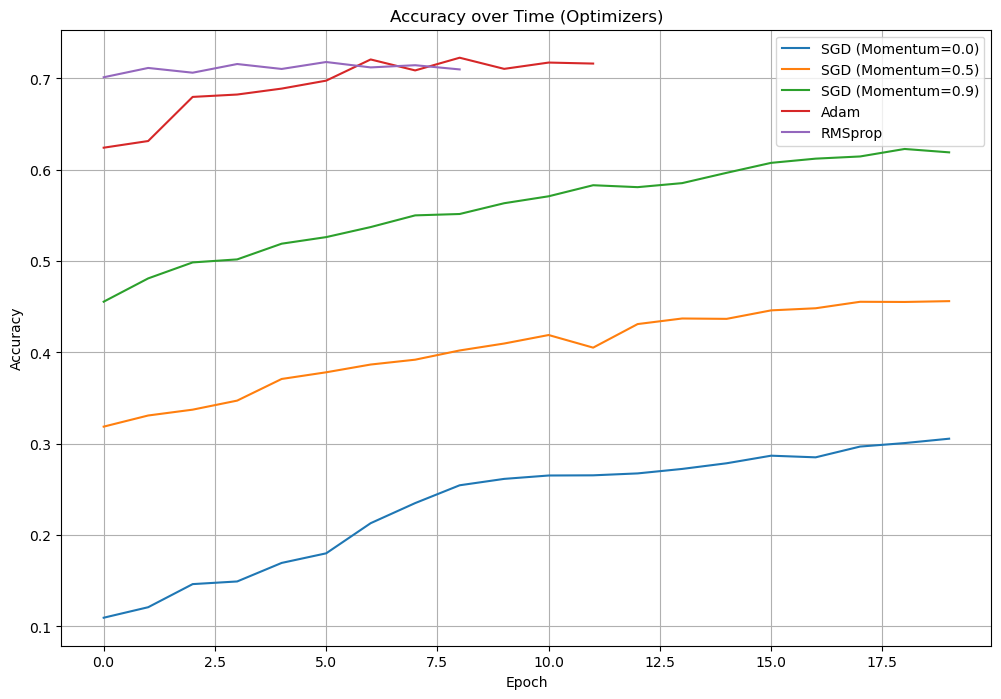

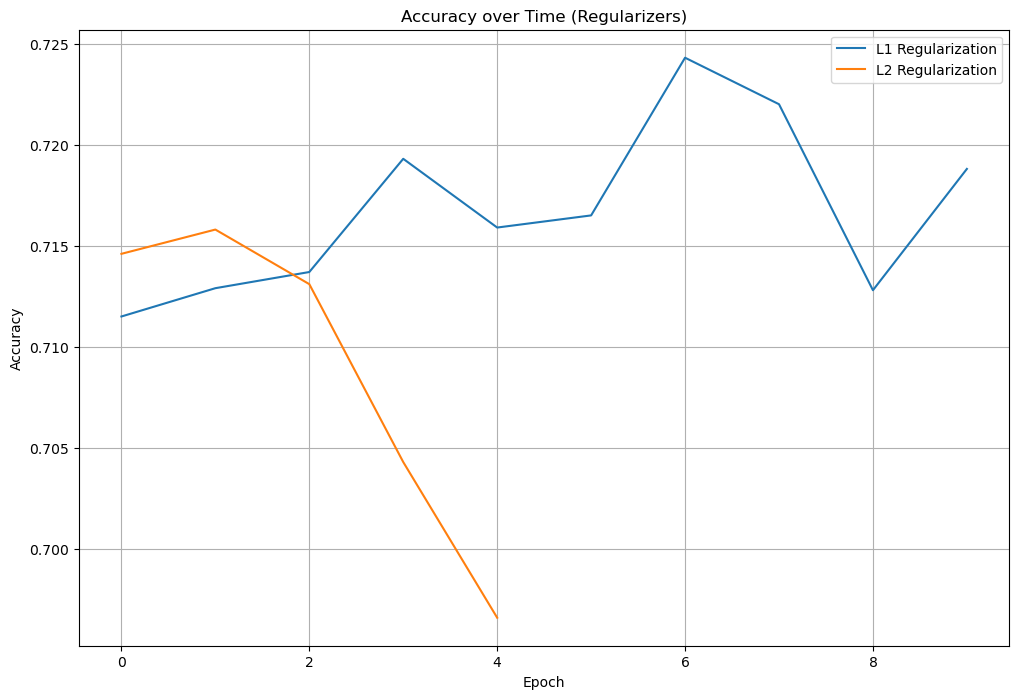

<Figure size 1200x800 with 0 Axes>

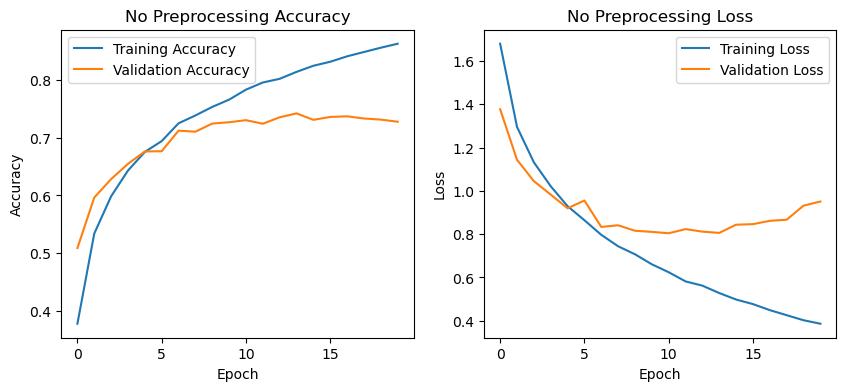

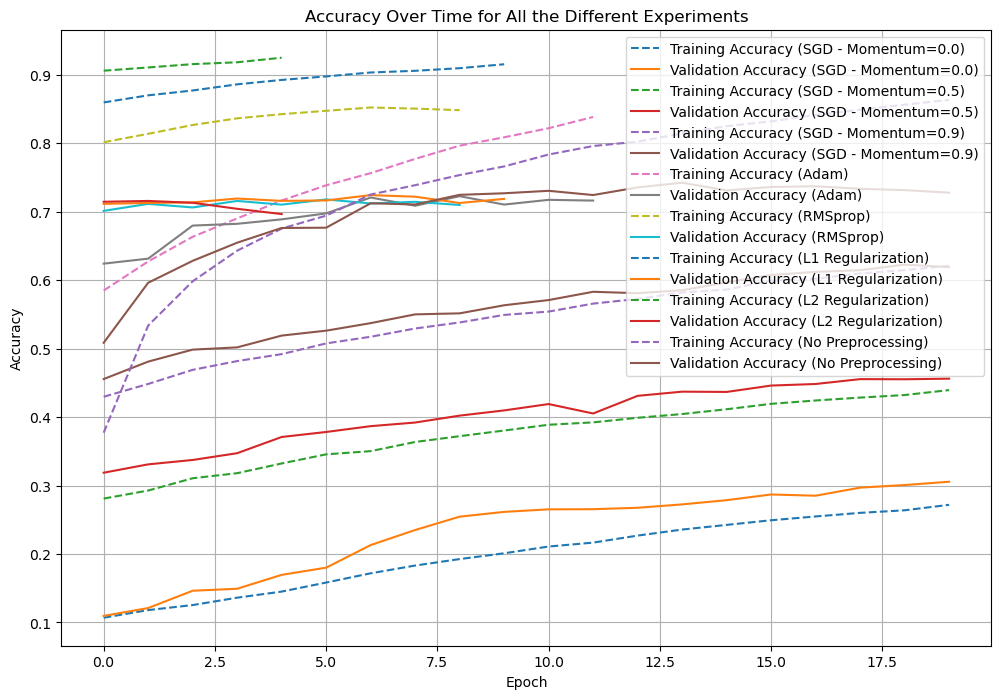

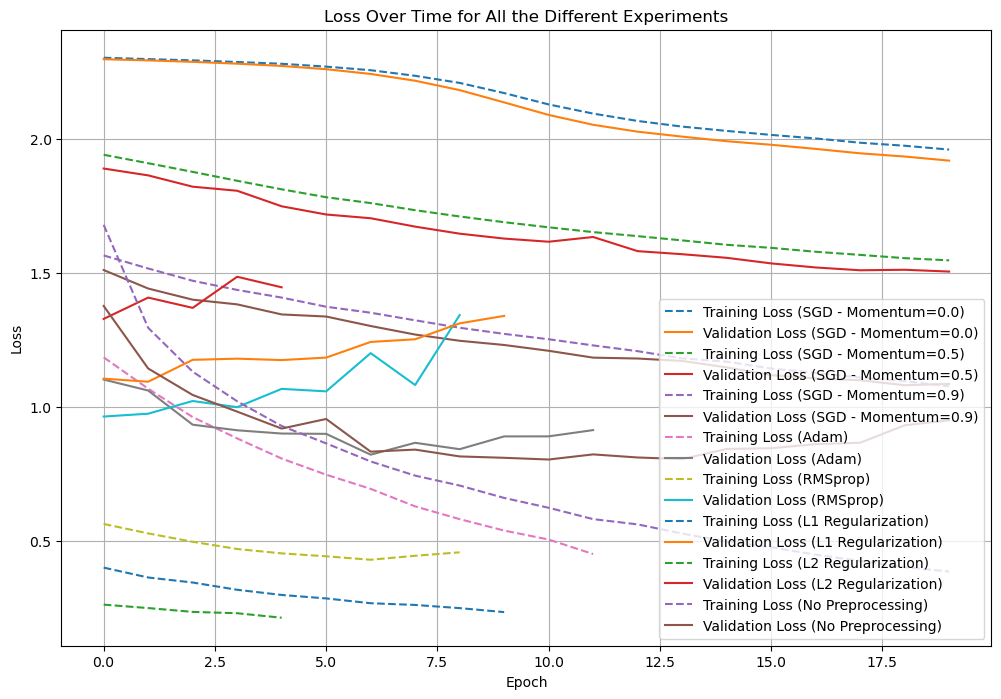

Step 10: Successfully Completed


In [20]:
print("Step 10: Plotting accuracy over time for different experiments...")

# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'SGD (Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['val_accuracy'], label='Adam')

# Plot RMSprop
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop')

plt.title('Accuracy over Time (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
# Plot L1 regularization
plt.plot(l1_history.history['val_accuracy'], label='L1 Regularization')

# Plot L2 regularization
plt.plot(l2_history.history['val_accuracy'], label='L2 Regularization')
plt.title('Accuracy over Time (Regularizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
# Plot accuracy and loss over time of no preprocessing
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('No Preprocessing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_no_preprocessing.history['loss'], label='Training Loss')
plt.plot(history_no_preprocessing.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('No Preprocessing Loss')

plt.show()




# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['accuracy'], label=f'Training Accuracy (SGD - Momentum={momentum})', linestyle='dashed')
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'Validation Accuracy (SGD - Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['accuracy'], label='Training Accuracy (Adam)', linestyle='dashed')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy (Adam)')

# Plot RMSprop
plt.plot(rmsprop_history.history['accuracy'], label='Training Accuracy (RMSprop)', linestyle='dashed')
plt.plot(rmsprop_history.history['val_accuracy'], label='Validation Accuracy (RMSprop)')

# Plot L1 regularization
plt.plot(l1_history.history['accuracy'], label='Training Accuracy (L1 Regularization)', linestyle='dashed')
plt.plot(l1_history.history['val_accuracy'], label='Validation Accuracy (L1 Regularization)')

# Plot L2 regularization
plt.plot(l2_history.history['accuracy'], label='Training Accuracy (L2 Regularization)', linestyle='dashed')
plt.plot(l2_history.history['val_accuracy'], label='Validation Accuracy (L2 Regularization)')

# Plot no preprocessing
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy (No Preprocessing)', linestyle='dashed')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy (No Preprocessing)')

plt.title('Accuracy Over Time for All the Different Experiments')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Plot loss over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['loss'], label=f'Training Loss (SGD - Momentum={momentum})', linestyle='dashed')
    plt.plot(sgd_histories[i].history['val_loss'], label=f'Validation Loss (SGD - Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['loss'], label='Training Loss (Adam)', linestyle='dashed')
plt.plot(adam_history.history['val_loss'], label='Validation Loss (Adam)')

# Plot RMSprop
plt.plot(rmsprop_history.history['loss'], label='Training Loss (RMSprop)', linestyle='dashed')
plt.plot(rmsprop_history.history['val_loss'], label='Validation Loss (RMSprop)')

# Plot L1 regularization
plt.plot(l1_history.history['loss'], label='Training Loss (L1 Regularization)', linestyle='dashed')
plt.plot(l1_history.history['val_loss'], label='Validation Loss (L1 Regularization)')

# Plot L2 regularization
plt.plot(l2_history.history['loss'], label='Training Loss (L2 Regularization)', linestyle='dashed')
plt.plot(l2_history.history['val_loss'], label='Validation Loss (L2 Regularization)')

# Plot no preprocessing
plt.plot(history_no_preprocessing.history['loss'], label='Training Loss (No Preprocessing)', linestyle='dashed')
plt.plot(history_no_preprocessing.history['val_loss'], label='Validation Loss (No Preprocessing)')

plt.title('Loss Over Time for All the Different Experiments')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Step 10: Successfully Completed")


# Finally Analyzing  the Results

## 1. Effect of Different Optimizers:
The code perform different optimizers: SGD, Adam, and RMSprop, on the CIFAR-10 dataset. For each optimizer, the model is trained with different parameter settings. The model is trained with different momentums (0.0, 0.5, 0.9) for SGD, the default settings for Adam, and the default settings for RMSprop.

- SGD: The model is trained with three different momentums: 0.0, 0.5, and 0.9. Momentum helps the optimizer to accelerate in the relevant direction and dampen oscillations, leading to faster convergence. However, too high momentum may cause overshooting, and too low momentum may slow down the training process. As seen in the training logs, SGD with a momentum of 0.9 achieves the highest training accuracy (0.2719) but is not the best performer in terms of validation accuracy (0.3056).

- Adam: Adam is an adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSprop. It adapts the learning rates of each parameter based on their historical gradients. Adam performs well in many scenarios and requires less hyperparameter tuning. As shown in the training logs, Adam achieves higher training accuracy (0.6210) and validation accuracy (0.6191) compared to SGD.

- RMSprop: RMSprop is another adaptive learning rate optimization algorithm that helps address the diminishing learning rate problem of AdaGrad. It uses a moving average of the squared gradients to scale the learning rate. As seen in the training logs, RMSprop achieves a training accuracy of 0.8384 and a validation accuracy of 0.7163, which is better than SGD but slightly lower than Adam.

From above we can see, Adam outperforms SGD and RMSprop in this particular experiment on the CIFAR-10 dataset. It achieves the highest validation accuracy and converges faster compared to the other optimizers.

## 2. Effect of Regularization (L1/L2) in Conv2D Layer:
Regularization techniques like L1 and L2 regularization are used to prevent overfitting by adding penalty terms to the loss function to discourage large weights in the model. Since there is no explicit regularization applied in the Conv2D layers, the model might be prone to overfitting, especially given the small size of the CIFAR-10 dataset.

## 3. Comparison of Data Preprocessing vs. No Preprocessing:
The code performs data preprocessing by normalizing the pixel values of the images to be in the range [0, 1]. Preprocessing the data is crucial for training deep learning models as it helps the optimization process and can prevent convergence issues. Normalization scales the data to a common range, making it easier for the optimizer to find a suitable learning rate and converge more efficiently.

### Data Preprocessing Pros:
1. Improved Convergence: Preprocessing techniques such as normalization, scaling, and feature scaling can help the model converge faster during training. It helps in achieving a stable gradient and reduces the chance of getting stuck in local minima.
2. Enhanced Model Performance: Preprocessing can lead to better model performance by reducing the impact of irrelevant features and noise in the data. It helps the model focus on the most important patterns and relationships in the data.
3. Reduced Overfitting: Data preprocessing techniques like data augmentation and dropout can help in reducing overfitting. Data augmentation increases the effective size of the training dataset, while dropout prevents the model from relying too much on any specific set of features.

### Data Preprocessing Cons:
1. Increased Computational Complexity: Some preprocessing techniques can increase the computational complexity of the model, especially data augmentation methods that generate additional data. This may require more resources and time during training.
2. Information Loss: In some cases, preprocessing might remove or alter certain information from the data, leading to potential loss of valuable details. It's essential to choose preprocessing techniques carefully to avoid significant information loss.

### No Preprocessing Pros:
1. Simplicity: Without preprocessing, the model training pipeline is simpler, as it involves feeding the raw data directly to the model.
2. Retaining Original Information: By not preprocessing the data, the model gets access to the raw information as it is, without any modifications.

### No Preprocessing Cons:
1. Poor Convergence: Without preprocessing, the model may converge slowly or might not converge at all. This is especially true for optimization algorithms that require well-scaled data.
2. Overfitting: Raw data often contains noise and irrelevant features, which can lead to overfitting. Without preprocessing, the model is more susceptible to memorizing noise and overfitting to the training data.
3. Reduced Performance: Models trained on raw data might have lower performance compared to models trained on preprocessed data. This is because the model may not be able to capture the underlying patterns and relationships effectively.